In [105]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

## Импортирует .csv файлы

In [106]:
# Try with ISO-8859-1
try:
    df = pd.read_csv("./OnlineRetail.csv", encoding='ISO-8859-1')
except UnicodeDecodeError:
    # If ISO-8859-1 fails, try with Windows-1252
    df = pd.read_csv("./OnlineRetail.csv", encoding='windows-1252')

## Исследуем данные

In [107]:
df.shape

(541909, 8)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Нулевые значения

In [108]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

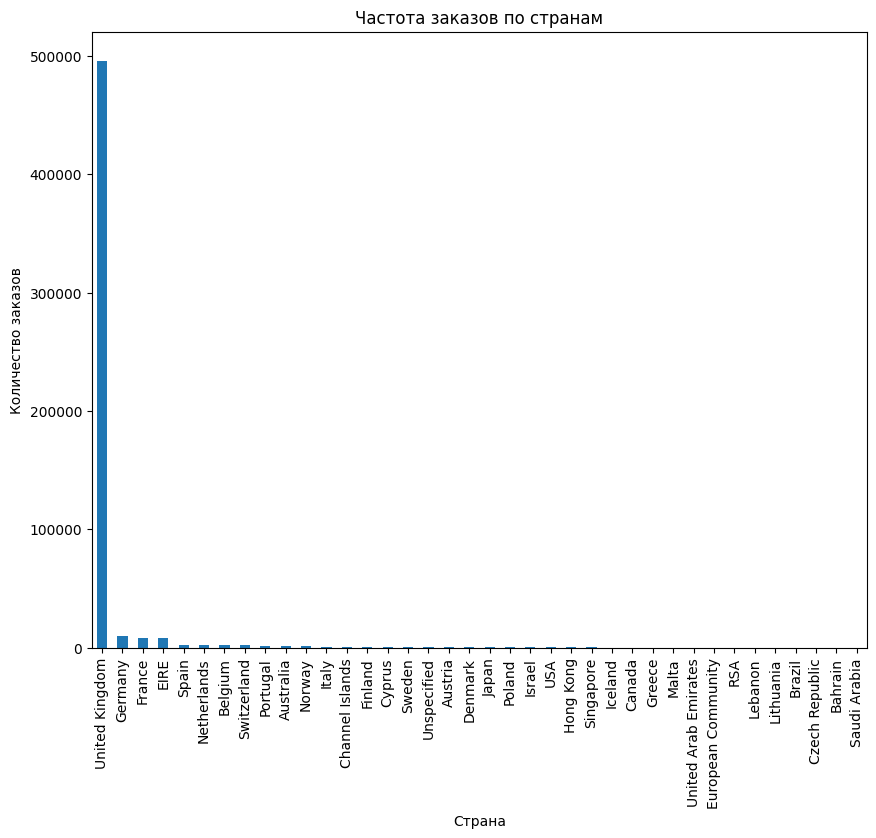

In [110]:
# Построение графика частоты стран
country_counts = df['Country'].value_counts()

plt.figure(figsize=(10, 8))
country_counts.plot(kind='bar')
plt.title('Частота заказов по странам')
plt.xlabel('Страна')
plt.ylabel('Количество заказов')
plt.xticks(rotation=90)
plt.show()

In [111]:
customer_id_non_unique = df['CustomerID'].nunique()
invoice_id_non_unique = df['InvoiceNo'].nunique()

customer_id_non_unique, invoice_id_non_unique


(4372, 25900)

In [112]:
df['CustomerID'] = df['CustomerID'].astype(str)

In [114]:
df.describe()

,Quantity,UnitPrice
count,540455.000000,540455.000000
mean,9.603129,4.623519
std,218.007598,96.889628
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


## Убираем нулевые строки

In [113]:
df = df.dropna()
df.shape

(540455, 8)

## Подсчет суммы, потраченной клиентами

In [115]:
df['Amount'] = df['UnitPrice'] * df['Quantity']
df = df.reset_index()
df.head()


,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


## Получаем суммы средств, которые клиент потратил за lifitime

In [116]:
df_amount = df.groupby('CustomerID')['Amount'].sum()
df = df.reset_index()
df_amount.head()

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
Name: Amount, dtype: float64

## Определяем количество транзакций для каждого клиента

In [117]:
df_frequency = df.groupby('CustomerID')['InvoiceNo'].count()

In [118]:
df_frequency.head()

CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
Name: InvoiceNo, dtype: int64

In [119]:
df_f = pd.merge(df_amount,df_frequency ,how = 'inner', on='CustomerID')
df_f.head()

,Amount,InvoiceNo
CustomerID,,
12346.0,0.00,2
12347.0,4310.00,182
12348.0,1797.24,31
12349.0,1757.55,73
12350.0,334.40,17


## Расчет давности каждого клиента

In [120]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [121]:
df_max = df['InvoiceDate'].max()
df_max

Timestamp('2011-12-09 12:50:00')

In [122]:
df['diff'] = df_max - df['InvoiceDate']

In [124]:
df.head()

,level_0,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,diff
0,0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [123]:
df_diff= df.groupby('CustomerID')['diff'].min()

In [125]:
df_diff.reset_index()
df_diff.head()

CustomerID
12346.0   325 days 02:33:00
12347.0     1 days 20:58:00
12348.0    74 days 23:37:00
12349.0    18 days 02:59:00
12350.0   309 days 20:49:00
Name: diff, dtype: timedelta64[ns]

## Формируем конечный датасет

In [126]:
df_final = pd.merge(df_f, df_diff , how = 'inner' , on = 'CustomerID')
df_final.head()

,Amount,InvoiceNo,diff
CustomerID,,,
12346.0,0.00,2,325 days 02:33:00
12347.0,4310.00,182,1 days 20:58:00
12348.0,1797.24,31,74 days 23:37:00
12349.0,1757.55,73,18 days 02:59:00
12350.0,334.40,17,309 days 20:49:00


In [127]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4373 entries, 12346.0 to nan
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   Amount     4373 non-null   float64        
 1   InvoiceNo  4373 non-null   int64          
 2   diff       4373 non-null   timedelta64[ns]
dtypes: float64(1), int64(1), timedelta64[ns](1)
memory usage: 136.7+ KB


In [128]:
df_final = df_final.rename({'InvoiceNo': 'Frequency', 'diff': 'Recency'}, axis=1)

In [129]:
df_final.head()

,Amount,Frequency,Recency
CustomerID,,,
12346.0,0.00,2,325 days 02:33:00
12347.0,4310.00,182,1 days 20:58:00
12348.0,1797.24,31,74 days 23:37:00
12349.0,1757.55,73,18 days 02:59:00
12350.0,334.40,17,309 days 20:49:00


In [130]:
df_final['Recency'] = df_final['Recency'].dt.days

In [131]:
df_final.head()

,Amount,Frequency,Recency
CustomerID,,,
12346.0,0.00,2,325
12347.0,4310.00,182,1
12348.0,1797.24,31,74
12349.0,1757.55,73,18
12350.0,334.40,17,309


In [132]:
attributes = ['Amount' , 'Frequency' , 'Recency' ]

# **Checking data for outliers**

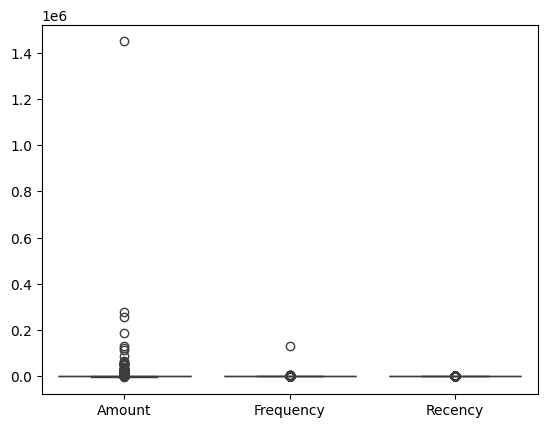

In [133]:
import seaborn as sns
#sns.set_theme(style="whitegrid")
#tips = sns.load_dataset("tips")
ax = sns.boxplot(data = df_final[attributes])

## Удаление выбросов 

In [134]:
Q1 = df_final.Amount.quantile(0.05)
Q3 = df_final.Amount.quantile(0.95)
IQR = Q3 - Q1
df_final = df_final[(df_final.Amount >= Q1 - 1.5 * IQR) & (df_final.Amount <= Q3 + 1.5 * IQR) ]

Q1 = df_final.Recency.quantile(0.05)
Q3 = df_final.Recency.quantile(0.95)
IQR = Q3 - Q1
df_final = df_final[(df_final.Recency >= Q1 - 1.5 * IQR) & (df_final.Recency <= Q3 + 1.5 * IQR) ]

Q1 = df_final.Frequency.quantile(0.05)
Q3 = df_final.Frequency.quantile(0.95)
IQR = Q3 - Q1
df_final = df_final[(df_final.Frequency >= Q1 - 1.5 * IQR) & (df_final.Frequency <= Q3 + 1.5 * IQR) ]

## Скейлинг данных, чтобы каждая колонка имела одинаковый масштаб

In [135]:
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
# transform data
df1 = scaler.fit_transform(df_final)

In [136]:
import pandas as pd
df_f = pd.DataFrame(df1)
df_f.columns = ['Amount' , 'Frequency' , 'Recency']
df_f.head

<bound method NDFrame.head of         Amount  Frequency   Recency
0    -0.721139  -0.753083  2.301868
1     1.719726   1.041594 -0.906269
2     0.296685  -0.463941 -0.183448
3     0.274207  -0.045183 -0.737941
4    -0.531759  -0.603527  2.143441
...        ...        ...       ...
4289 -0.622655  -0.683290 -0.193350
4290 -0.618860  -0.673320  1.826588
4291 -0.675368  -0.703231  0.866128
4292 -0.621126  -0.643408 -0.846859
4293  0.319361  -0.075094 -0.500301

[4294 rows x 3 columns]>

# **Performaing K-Means Clustering**

In [137]:

# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(df_f)

KMeans(n_clusters=2)

In [138]:
# inertia on the fitted data
kmeans.inertia_

7667.216616124013

## Расчет идеального количества кластеров

**Определение:** Инерция в контексте k-means — это сумма квадратов расстояний между каждым объектом и центроидом его кластера. Это мера внутрикластерного расстояния, и цель k-means состоит в том, чтобы минимизировать эту сумму.

**Использование:** Инерция используется для оценки качества кластеризации. Чем меньше инерция, тем ближе объекты находятся к центроидам своих кластеров. Однако слишком маленькая инерция может указывать на излишнее количество кластеров (переобучение).

Text(0, 0.5, 'Inertia')

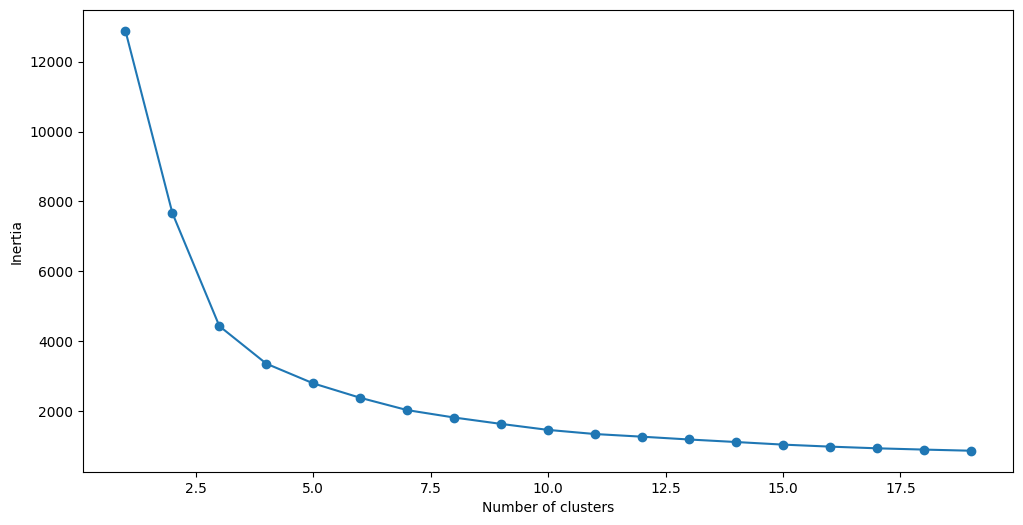

In [139]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df_f)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [140]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 4, init='k-means++')
kmeans.fit(df_f)
pred = kmeans.predict(df_f)

In [141]:
frame = pd.DataFrame(df_f)
frame['cluster'] = pred
frame['cluster'].value_counts()

cluster
1    2301
3    1039
0     751
2     203
Name: count, dtype: int64

In [142]:
import matplotlib.pyplot as plt

In [143]:
pred

array([3, 0, 1, ..., 3, 1, 1], dtype=int32)

In [144]:
df_final['Label'] = pred

## Построение графиков различных кластеров с использованием двух объектов одновременно

<Axes: xlabel='Amount', ylabel='Recency'>

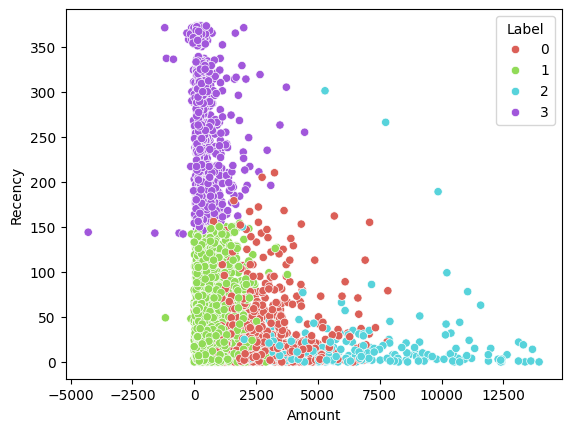

In [145]:
sns.scatterplot(x=df_final['Amount'], y=df_final['Recency'], hue=df_final['Label'], palette=sns.color_palette('hls', 4))

<Axes: xlabel='Amount', ylabel='Frequency'>

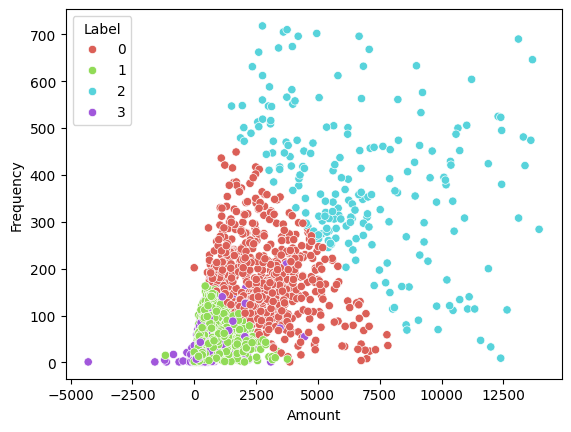

In [146]:
sns.scatterplot(x=df_final['Amount'], y=df_final['Frequency'], hue=df_final['Label'], palette=sns.color_palette('hls', 4))

<Axes: xlabel='Frequency', ylabel='Recency'>

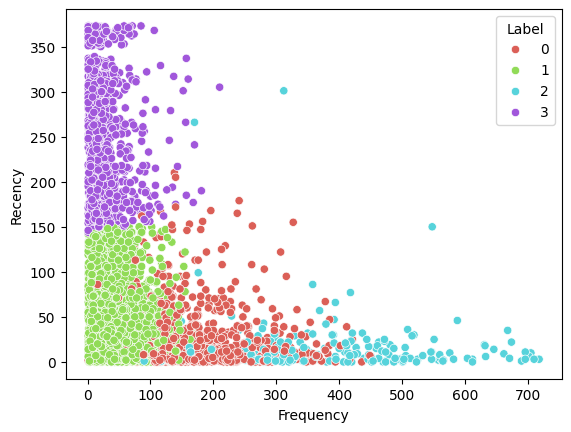

In [147]:
# Предполагается, что df_final - это ваш DataFrame
sns.scatterplot(x=df_final['Frequency'], y=df_final['Recency'], hue=df_final['Label'], palette=sns.color_palette('hls', 4))

## Построение графиков со всеми фичами одновременно

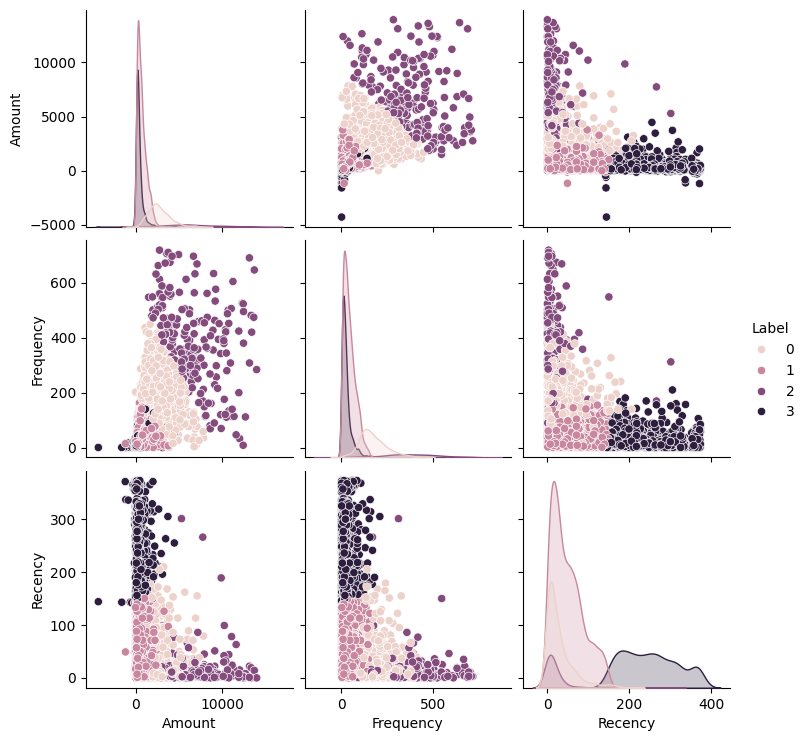

In [148]:
sns.pairplot(data=df_final, vars=['Amount', 'Frequency', 'Recency'], hue='Label')


## DBSCAN

In [149]:
from sklearn.cluster import DBSCAN
import seaborn as sns
import pandas as pd

In [150]:
df_final.head()

,Amount,Frequency,Recency,Label
CustomerID,,,,
12346.0,0.00,2,325,3
12347.0,4310.00,182,1,0
12348.0,1797.24,31,74,1
12349.0,1757.55,73,18,1
12350.0,334.40,17,309,3


In [151]:
db_scan_df = df_final[['Amount', 'Frequency', 'Recency']]
db_scan_df_scaled = scaler.fit_transform(db_scan_df)


# Преобразуем масштабированные данные обратно в DataFrame
db_scan_df_scaled = pd.DataFrame(db_scan_df_scaled, columns=['Amount', 'Frequency', 'Recency'])



In [153]:
# Создаем объект DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Предполагаем, что dbscan уже создан с нужными параметрами
db_scan_df_scaled['dbscan_label'] = dbscan.fit_predict(db_scan_df_scaled[['Amount', 'Frequency', 'Recency']])



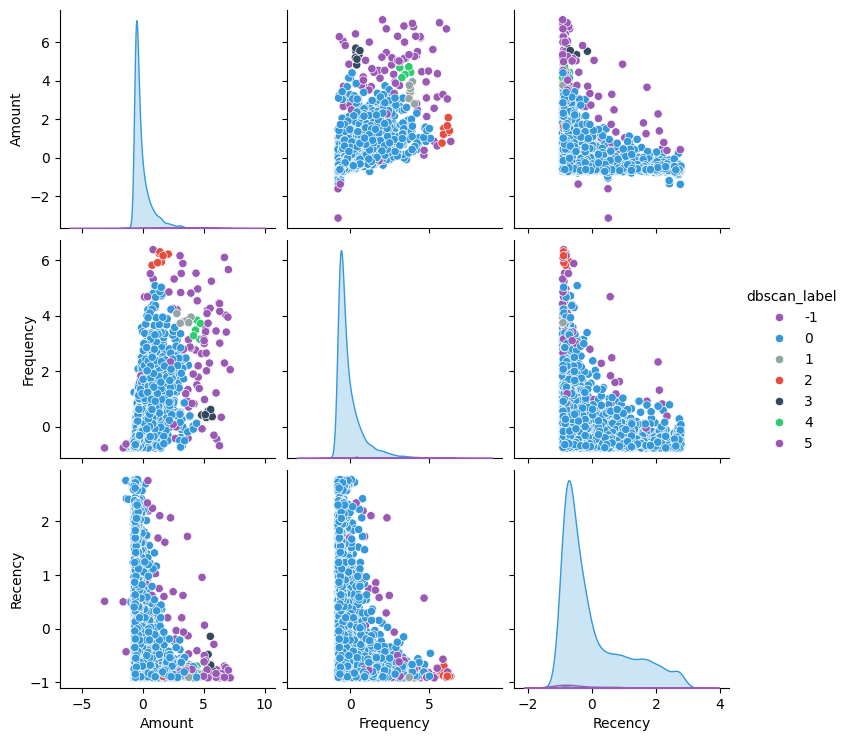

In [154]:

# Определение цветов вручную
manual_palette = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

sns.pairplot(data=db_scan_df_scaled, vars=['Amount', 'Frequency', 'Recency'], hue='dbscan_label', palette=manual_palette)

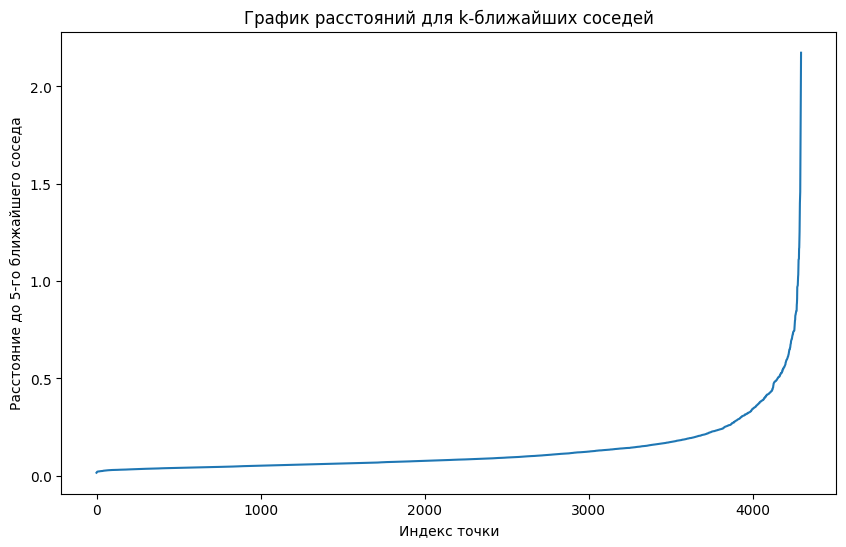

In [155]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Выберем значение min_samples
min_samples = 5

# Инициализируем модель NearestNeighbors
nn = NearestNeighbors(n_neighbors=min_samples)

# Обучаем модель
nn.fit(db_scan_df_scaled[['Amount', 'Frequency', 'Recency']])

# Находим расстояния и индексы k-ближайших соседей
distances, indices = nn.kneighbors(db_scan_df_scaled[['Amount', 'Frequency', 'Recency']])

# Сортируем расстояния
sorted_distances = np.sort(distances[:, -1], axis=0)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(sorted_distances)
plt.title("График расстояний для k-ближайших соседей")
plt.xlabel("Индекс точки")
plt.ylabel("Расстояние до 5-го ближайшего соседа")
plt.show()


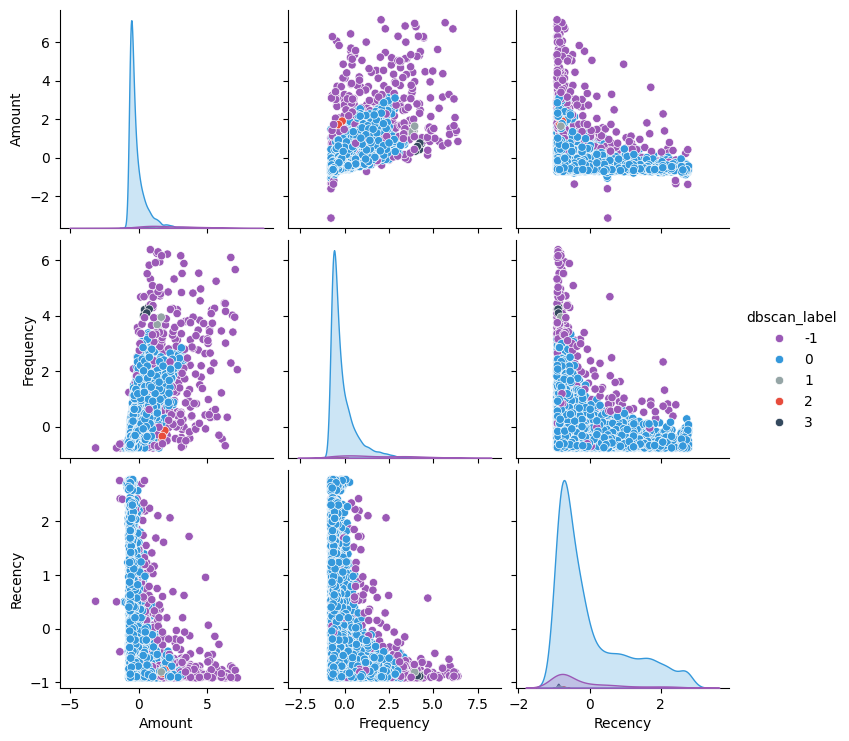

In [156]:
# Создаем объект DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)

# Предполагаем, что dbscan уже создан с нужными параметрами
db_scan_df_scaled['dbscan_label'] = dbscan.fit_predict(db_scan_df_scaled[['Amount', 'Frequency', 'Recency']])

sns.pairplot(data=db_scan_df_scaled, vars=['Amount', 'Frequency', 'Recency'], hue='dbscan_label', palette=manual_palette)

In [157]:
# Продолжим с ранее использованными расстояниями
distances, indices = nn.kneighbors(db_scan_df_scaled[['Amount', 'Frequency', 'Recency']])

# Вычислим 95-й процентиль расстояний до 5-го ближайшего соседа
eps_optimal = np.percentile(distances[:, 4], 95)

# Выведем рассчитанное значение eps
eps_optimal

0.4085438005100963

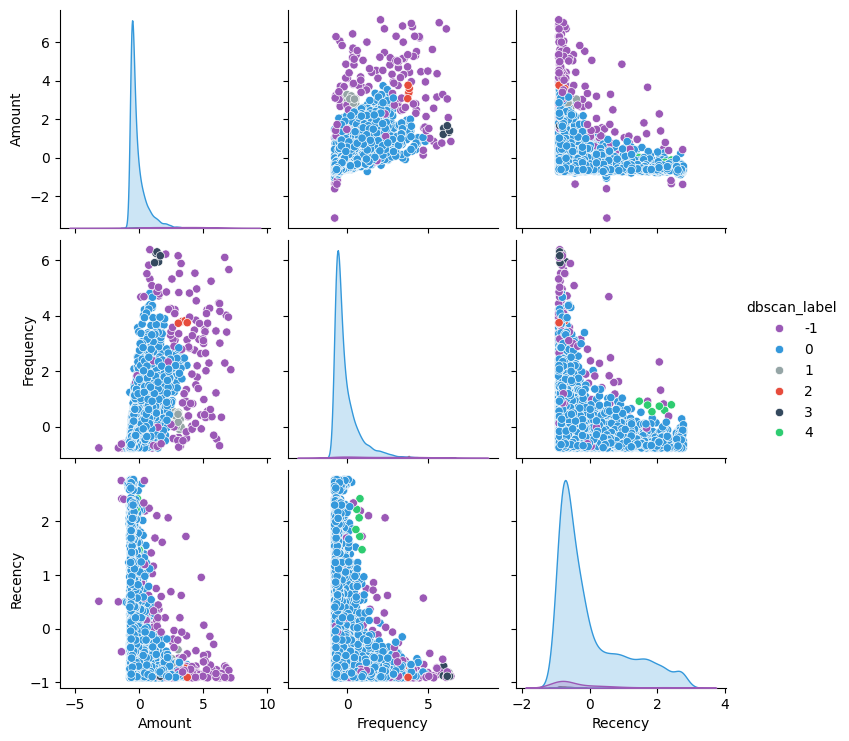

In [158]:
# Создаем объект DBSCAN
dbscan = DBSCAN(eps=0.408, min_samples=5)

# Предполагаем, что dbscan уже создан с нужными параметрами
db_scan_df_scaled['dbscan_label'] = dbscan.fit_predict(db_scan_df_scaled[['Amount', 'Frequency', 'Recency']])

sns.pairplot(data=db_scan_df_scaled, vars=['Amount', 'Frequency', 'Recency'], hue='dbscan_label', palette=manual_palette)

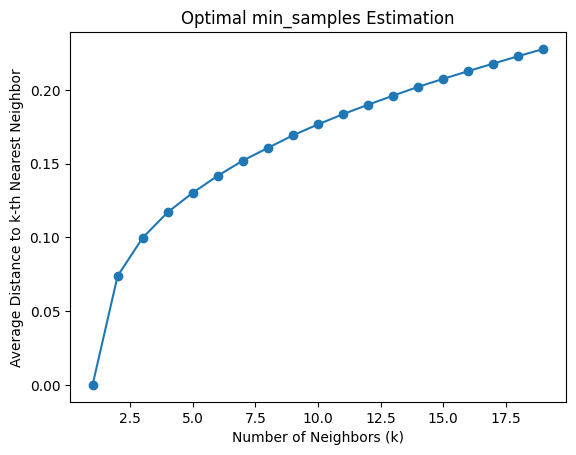

In [159]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Анализ расстояний до различного количества ближайших соседей
k_values = range(1, 20)
avg_distances = []

for k in k_values:
    nn = NearestNeighbors(n_neighbors=k)
    nn.fit(db_scan_df_scaled[['Amount', 'Frequency', 'Recency']])
    distances, _ = nn.kneighbors(db_scan_df_scaled[['Amount', 'Frequency', 'Recency']])
    avg_distances.append(np.mean(distances[:, -1]))

# Построение графика средних расстояний
plt.plot(k_values, avg_distances, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Average Distance to k-th Nearest Neighbor')
plt.title('Optimal min_samples Estimation')
plt.show()

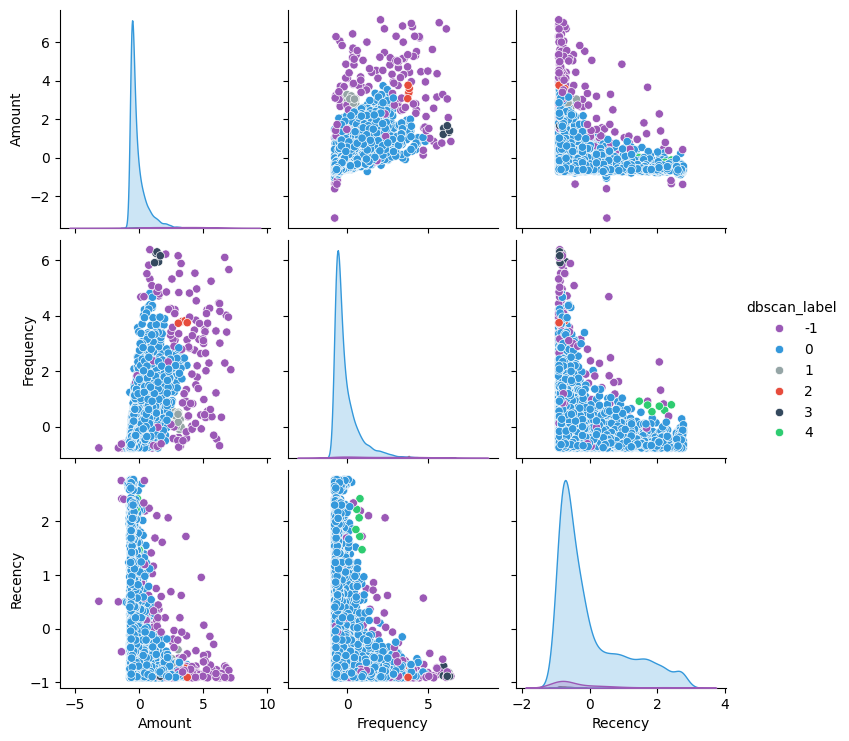

In [160]:
# Создаем объект DBSCAN
dbscan = DBSCAN(eps=0.408, min_samples=5)

# Предполагаем, что dbscan уже создан с нужными параметрами
db_scan_df_scaled['dbscan_label'] = dbscan.fit_predict(db_scan_df_scaled[['Amount', 'Frequency', 'Recency']])

sns.pairplot(data=db_scan_df_scaled, vars=['Amount', 'Frequency', 'Recency'], hue='dbscan_label', palette=manual_palette)

In [172]:

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Предположим, что у нас уже есть DataFrame 'df_final' с нужными признаками и целевой переменной 'Target'
# 'Target' может быть создан или загружен как часть вашего DataFrame в зависимости от задачи классификации

# Разделение данных на признаки и целевую переменную
X = db_scan_df_scaled['Amount', 'Recency']
y = db_scan_df_scaled['Frequency']  # Замените 'Target' на имя вашей целевой переменной

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание и обучение модели
model = GaussianNB()
model.fit(X_train, y_train)

# Предсказания на тестовом наборе
y_pred = model.predict(X_test)

# Оценка модели
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))


KeyError: ('Amount', 'Recency')